In [2]:
from tensorflow.keras.datasets import mnist

(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

print("Full training dataset:", x_train_full.shape)
print("Test dataset:", x_test.shape)


Full training dataset: (60000, 28, 28)
Test dataset: (10000, 28, 28)


In [3]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

print("Training dataset:", x_train.shape)
print("Validation dataset:", x_val.shape)


Training dataset: (48000, 28, 28)
Validation dataset: (12000, 28, 28)


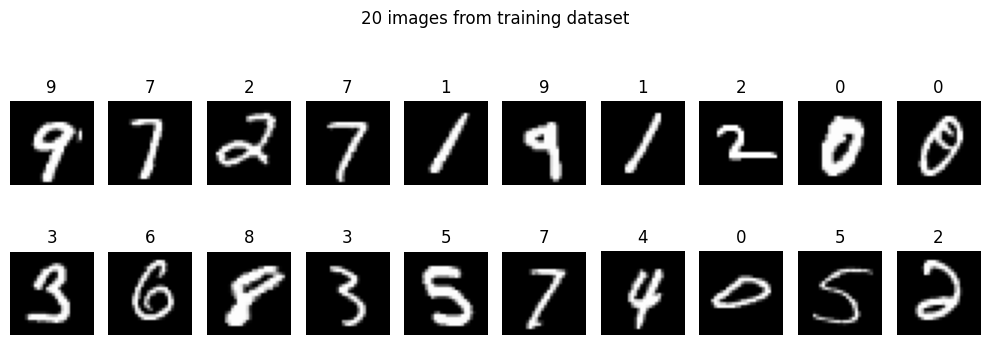

In [4]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 4))
for i in range(20):
    idx = np.random.randint(0, len(x_train))
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_train[idx], cmap='gray')
    plt.axis('off')
    plt.title(y_train[idx])
plt.suptitle("20 images from training dataset")
plt.tight_layout()
plt.show()


In [5]:
import collections

counter = collections.Counter(y_train)
for label in sorted(counter):
    print(f"Number {label}: {counter[label]} images")


Number 0: 4748 images
Number 1: 5420 images
Number 2: 4784 images
Number 3: 4912 images
Number 4: 4666 images
Number 5: 4317 images
Number 6: 4741 images
Number 7: 4966 images
Number 8: 4691 images
Number 9: 4755 images


In [6]:
print("Image size:", x_train[0].shape)


Image size: (28, 28)


In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()


/home/monika/miniconda3/envs/asii-env/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-05-14 18:00:10.561288: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [9]:
# normalize inputs
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# add 4th dimension
x_train = x_train[..., np.newaxis]
x_val = x_val[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# train
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(x_val, y_val)
)


Epoch 1/10


2025-05-14 18:00:45.499623: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 150528000 exceeds 10% of free system memory.


749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7603 - loss: 0.7379

2025-05-14 18:00:54.455366: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 37632000 exceeds 10% of free system memory.


750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7606 - loss: 0.7370 - val_accuracy: 0.9781 - val_loss: 0.0772
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.9553 - loss: 0.1574 - val_accuracy: 0.9815 - val_loss: 0.0655
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9685 - loss: 0.1093 - val_accuracy: 0.9852 - val_loss: 0.0479
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9733 - loss: 0.0887 - val_accuracy: 0.9870 - val_loss: 0.0487
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9765 - loss: 0.0800 - val_accuracy: 0.9872 - val_loss: 0.0421
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9794 - loss: 0.0677 - val_accuracy: 0.9877 - val_loss: 0.0419
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9808 - loss: 0.0605 - val_accuracy: 0.9894 - val_loss: 0.0369
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.9830 - loss: 0.0577 - val_accuracy: 0.990

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9886 - loss: 0.0320
Test accuracy: 0.9906


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


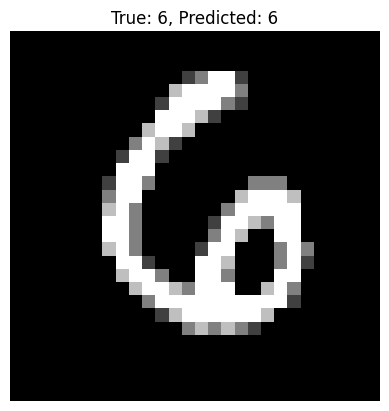

In [11]:
import matplotlib.pyplot as plt

i = np.random.randint(len(x_test))
img = x_test[i]
label = y_test[i]
pred = model.predict(img[np.newaxis, ...])
predicted_label = np.argmax(pred)

plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"True: {label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()
